IMPORTING THE DATASET

In [8]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['emplo.csv']))
print(df)


Saving emplo.csv to emplo.csv
    Employee_ID              Name   Department                   Position  \
0          1001          John Doe  Engineering          Software Engineer   
1          1002        Jane Smith    Marketing       Marketing Specialist   
2          1003   Michael Johnson        Sales              Sales Manager   
3          1004       Emily Brown  Engineering             Data Scientist   
4          1005      David Wilson      Finance          Financial Analyst   
5          1006       Sarah Clark  Engineering          Software Engineer   
6          1007   Robert Martinez    Marketing          Marketing Manager   
7          1008       Lisa Garcia        Sales            Sales Executive   
8          1009    James Thompson  Engineering              Data Engineer   
9          1010    Anna Rodriguez      Finance       Financial Controller   
10         1011     Michael White  Engineering  Machine Learning Engineer   
11         1012       Emma Harris    Marketing

DATA CLEANING AND PREPROCESSING


In [19]:
# DATA CLEANING
# Check for missing values in Agreement_Date
missing_agreement_date = df['Agreement_Date'].isnull().sum()

print(f"Missing Agreement_Date: {missing_agreement_date}")


# filling with a default date (ex: today's date)
df['Agreement_Date'].fillna(pd.Timestamp.today().date(), inplace=True)

avg_contract_term = df['Contract_Term'].mean()
avg_base_salary = df['Base_Salary'].mean()
avg_bonus = df['Bonus'].mean()

# Replace missing values with averages

df['Contract_Term'].fillna(round(avg_contract_term), inplace=True)
df['Base_Salary'].fillna(avg_base_salary, inplace=True)
df['Bonus'].fillna(avg_bonus, inplace=True)

# Calculate mode for Benefits, Cloud_Service_Used, Tools_Used
mode_benefits = df['Benefits'].mode()[0]
mode_cloud_service_used = df['Cloud_Service_Used'].mode()[0]
mode_tools_used = df['Tools_Used'].mode()[0]

# Replace missing values with mode
df['Benefits'].fillna(mode_benefits, inplace=True)
df['Cloud_Service_Used'].fillna(mode_cloud_service_used, inplace=True)
df['Tools_Used'].fillna(mode_tools_used, inplace=True)


# 1. Standardize Date Formats
# Assuming 'Agreement_Date' needs standardization to datetime format
df['Agreement_Date'] = pd.to_datetime(df['Agreement_Date'], errors='coerce')

# 2. Standardize Numerical Values
# Assuming 'Contract_Term', 'Base_Salary', and 'Bonus' are numerical columns
# Convert 'Contract_Term' to integers
df['Contract_Term'] = pd.to_numeric(df['Contract_Term'], errors='coerce').astype('Int64')

# Convert 'Base_Salary' and 'Bonus' to floats
df['Base_Salary'] = pd.to_numeric(df['Base_Salary'], errors='coerce').astype(float)
df['Bonus'] = pd.to_numeric(df['Bonus'], errors='coerce').astype(float)


# Confirm the data after cleaning
print(df)

# Save the cleaned data back to a file
df.to_csv('cleaned_employee_data.csv', index=False)


Missing Agreement_Date: 0
    Employee_ID              Name   Department                   Position  \
0          1001          John Doe  Engineering          Software Engineer   
1          1002        Jane Smith    Marketing       Marketing Specialist   
2          1003   Michael Johnson        Sales              Sales Manager   
3          1004       Emily Brown  Engineering             Data Scientist   
4          1005      David Wilson      Finance          Financial Analyst   
5          1006       Sarah Clark  Engineering          Software Engineer   
6          1007   Robert Martinez    Marketing          Marketing Manager   
7          1008       Lisa Garcia        Sales            Sales Executive   
8          1009    James Thompson  Engineering              Data Engineer   
9          1010    Anna Rodriguez      Finance       Financial Controller   
10         1011     Michael White  Engineering  Machine Learning Engineer   
11         1012       Emma Harris    Marketing    

EXPLORATORY DATA ANALYSIS


In [20]:
# Display the structure and summary of the DataFrame
print("Dataset Summary:")
print(df.info())
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Employee_ID         60 non-null     int64         
 1   Name                60 non-null     object        
 2   Department          60 non-null     object        
 3   Position            60 non-null     object        
 4   Agreement_Date      60 non-null     datetime64[ns]
 5   Contract_Term       60 non-null     Int64         
 6   Base_Salary         60 non-null     float64       
 7   Bonus               60 non-null     float64       
 8   Benefits            60 non-null     object        
 9   Cloud_Service_Used  60 non-null     object        
 10  Tools_Used          60 non-null     object        
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 5.3+ KB
None

Descriptive Statistics for Numerical Columns:
       Em

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

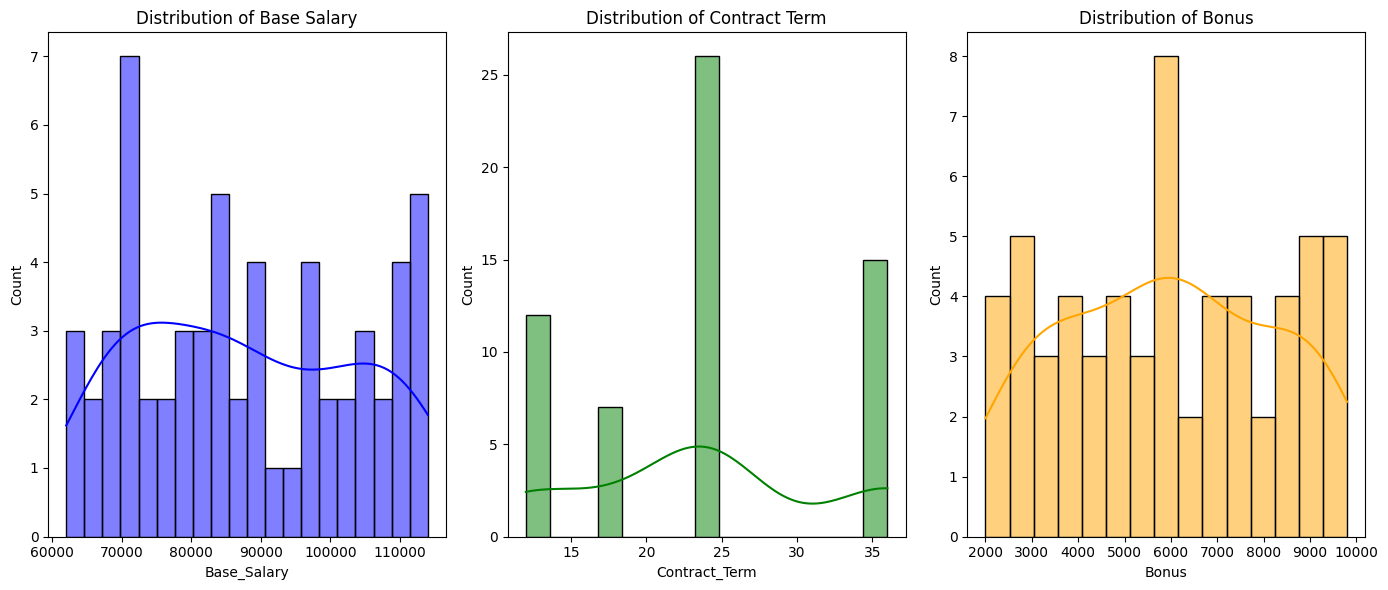

In [23]:
# Visualize the distribution of key numerical variables: Base_Salary, Contract_Term, and Bonus
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Base_Salary'], bins=20, kde=True, color='blue')
plt.title('Distribution of Base Salary')

plt.subplot(1, 3, 2)
sns.histplot(df['Contract_Term'].dropna(), bins=15, kde=True, color='green')
plt.title('Distribution of Contract Term')

plt.subplot(1, 3, 3)
sns.histplot(df['Bonus'], bins=15, kde=True, color='orange')
plt.title('Distribution of Bonus')

plt.tight_layout()
plt.show()


<ipython-input-24-d0cd4d428771>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cloud_count.index, y=cloud_count.values, palette='viridis')
<ipython-input-24-d0cd4d428771>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tools_count.index, y=tools_count.values, palette='plasma')


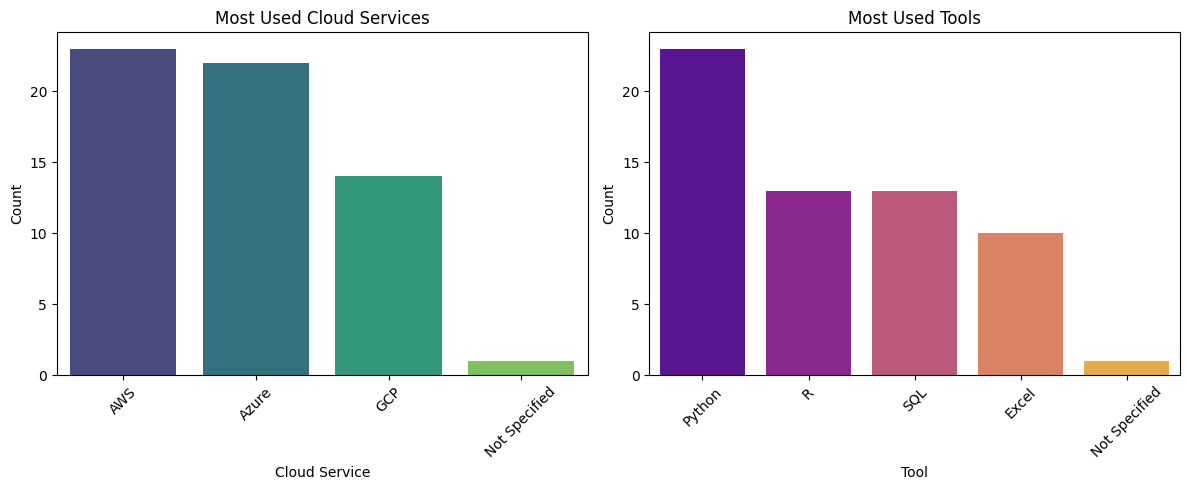

In [24]:
# Identify trends in the use of cloud services (Cloud_Service_Used) and tools (Tools_Used)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cloud_count = df['Cloud_Service_Used'].value_counts()
sns.barplot(x=cloud_count.index, y=cloud_count.values, palette='viridis')
plt.title('Most Used Cloud Services')
plt.xlabel('Cloud Service')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
tools_count = df['Tools_Used'].value_counts()
sns.barplot(x=tools_count.index, y=tools_count.values, palette='plasma')
plt.title('Most Used Tools')
plt.xlabel('Tool')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


TECHNICAL ANALYSIS: SQL QUERIES

In [31]:
!pip install pandasql


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=848f5b48aee882ab8b00b5f0e15195e8252ab3aed3c99de36a37eca56f825c93
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [42]:
import pandas as pd
from pandasql import sqldf



# Define a function to run SQL queries
pysqldf = lambda q: sqldf(q, globals())

# Example SQL query: Average Base_Salary for different Positions and Departments
query_avg_salary = """
SELECT Department, Position, AVG(Base_Salary) AS Avg_Base_Salary
FROM df
GROUP BY Department, Position
ORDER BY Department, Avg_Base_Salary DESC;
"""

# Execute the query using pandasql
avg_salary_result = pysqldf(query_avg_salary)

# Display the result
print("Average Base Salary for different Positions and Departments:")
print(avg_salary_result)


Average Base Salary for different Positions and Departments:
    Department              Position  Avg_Base_Salary
0  Engineering        Data Scientist          90000.0
1  Engineering     Software Engineer          83500.0
2      Finance     Financial Analyst          75000.0
3    Marketing     Marketing Manager          95000.0
4    Marketing  Marketing Specialist          65000.0
5        Sales       Sales Executive         110000.0
6        Sales         Sales Manager         100000.0


In [43]:
# Example SQL query: Total Bonus paid by Department
query_total_bonus = """
SELECT Department, SUM(Bonus) AS Total_Bonus
FROM df
GROUP BY Department
ORDER BY Total_Bonus DESC;
"""

# Execute the query using pandasql
total_bonus_result = pysqldf(query_total_bonus)

# Display the result
print("Total Bonus paid by Department:")
print(total_bonus_result)

Total Bonus paid by Department:
    Department  Total_Bonus
0        Sales        17000
1  Engineering        16500
2    Marketing        10000
3      Finance         4000


In [45]:
# SQL query to calculate count of employees in each department
query_employee_count = """
SELECT Department, COUNT(Employee_ID) AS Employee_Count
FROM df
GROUP BY Department
ORDER BY Employee_Count DESC;
"""

# Execute the query using pandasql
employee_count_result = pysqldf(query_employee_count)

# Display the result
print("Employee count by Department:")
print(employee_count_result)

Employee count by Department:
    Department  Employee_Count
0  Engineering               3
1        Sales               2
2    Marketing               2
3      Finance               1


TECHNICAL ANALYSIS:  Python scripts to perform data analysis and visualization.


Script 1: Data Analysis and Visualization of Employee Salaries


<ipython-input-46-b1c8825939cd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Base_Salary', data=avg_salary_by_dept, palette='viridis')


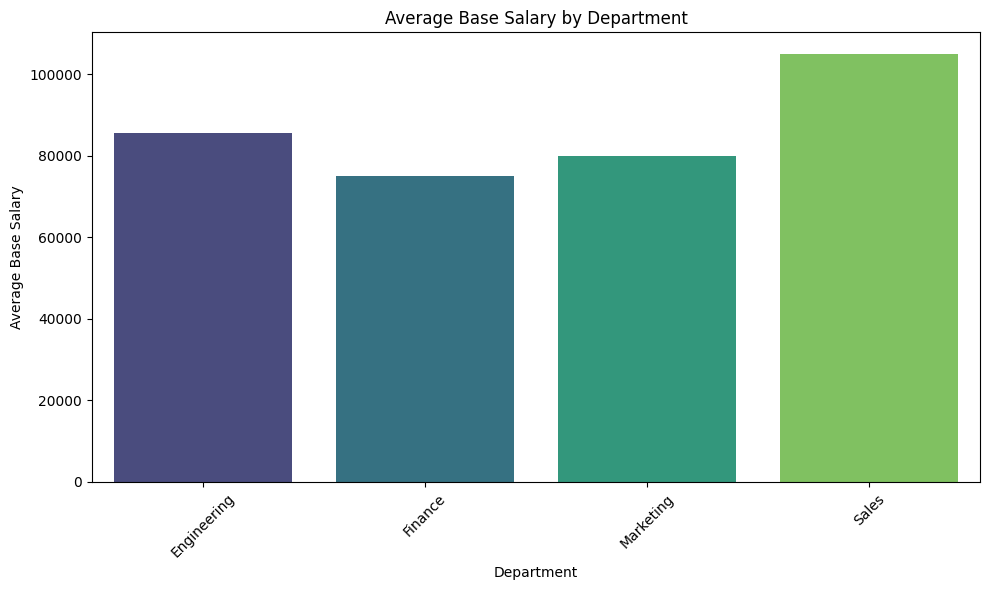

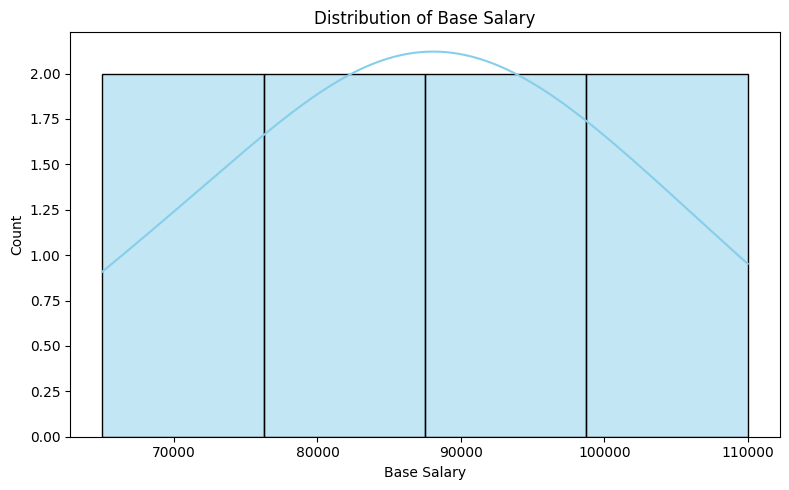

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis: Calculate average base salary by department
avg_salary_by_dept = df.groupby('Department')['Base_Salary'].mean().reset_index()

# Visualization 1: Bar plot of average base salary by department
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Base_Salary', data=avg_salary_by_dept, palette='viridis')
plt.title('Average Base Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Base Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Distribution plot of Base_Salary
plt.figure(figsize=(8, 5))
sns.histplot(df['Base_Salary'], kde=True, color='skyblue')
plt.title('Distribution of Base Salary')
plt.xlabel('Base Salary')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Script 2: Data Analysis and Visualization of Employee Bonuses


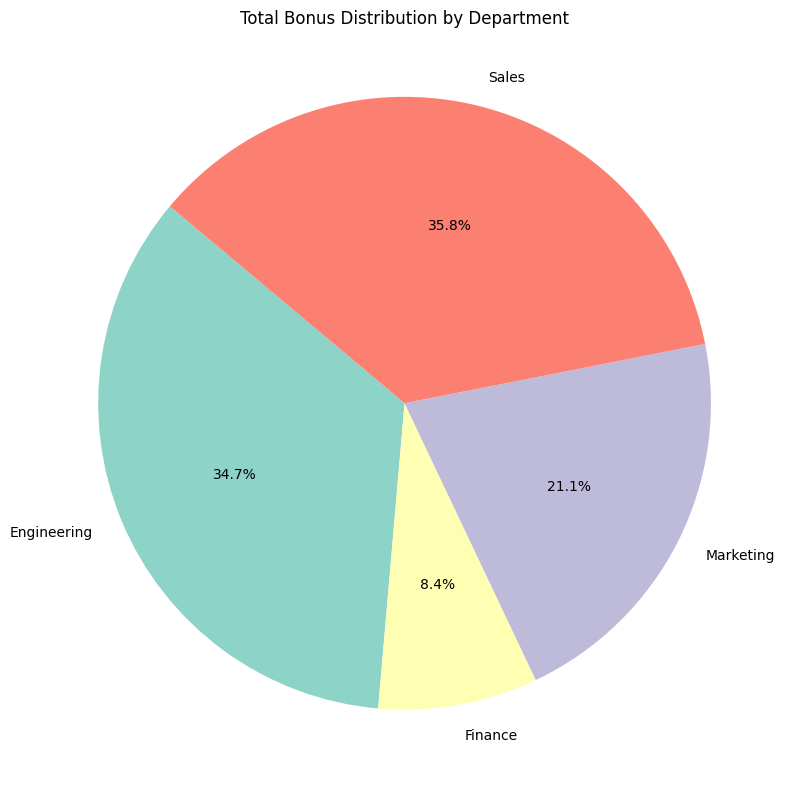

<ipython-input-47-d19517325073>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Bonus', data=df, palette='pastel')


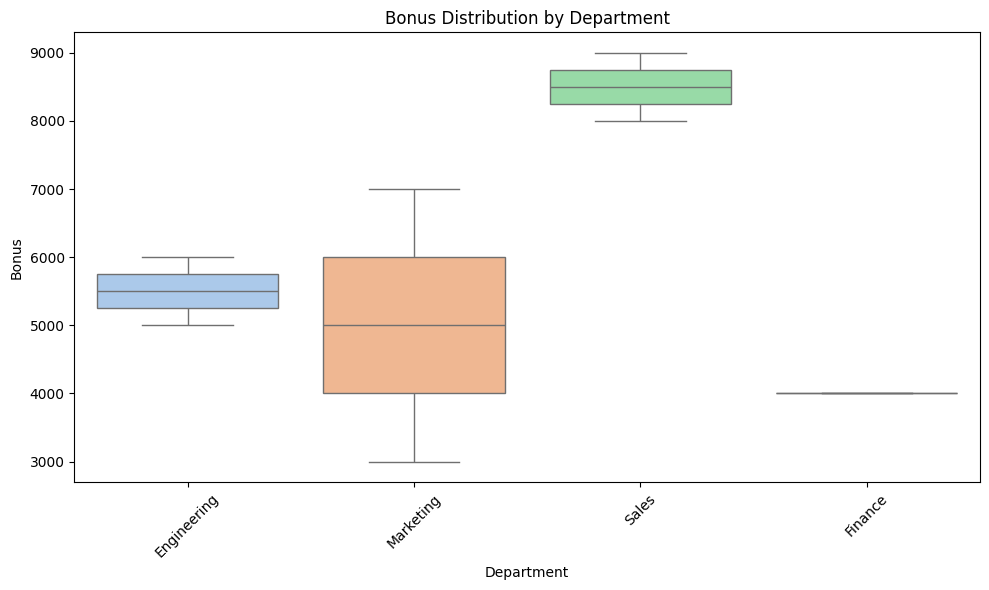

In [47]:
# Data analysis: Calculate total bonus by department
total_bonus_by_dept = df.groupby('Department')['Bonus'].sum().reset_index()

# Visualization 1: Pie chart of total bonus distribution by department
plt.figure(figsize=(8, 8))
plt.pie(total_bonus_by_dept['Bonus'], labels=total_bonus_by_dept['Department'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Total Bonus Distribution by Department')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Visualization 2: Box plot of Bonus by Department
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Bonus', data=df, palette='pastel')
plt.title('Bonus Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Bonus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Script 3: Data Analysis and Visualization of Employee Positions


<ipython-input-49-b3c085f776a5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Employee_Count', y='Position', data=employee_count_by_position, palette='Set2')


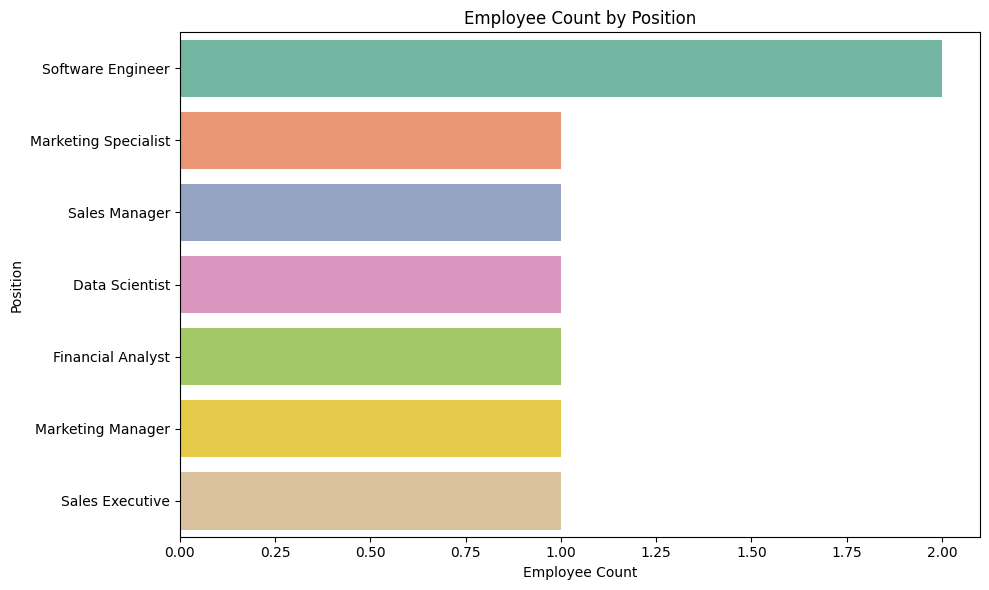

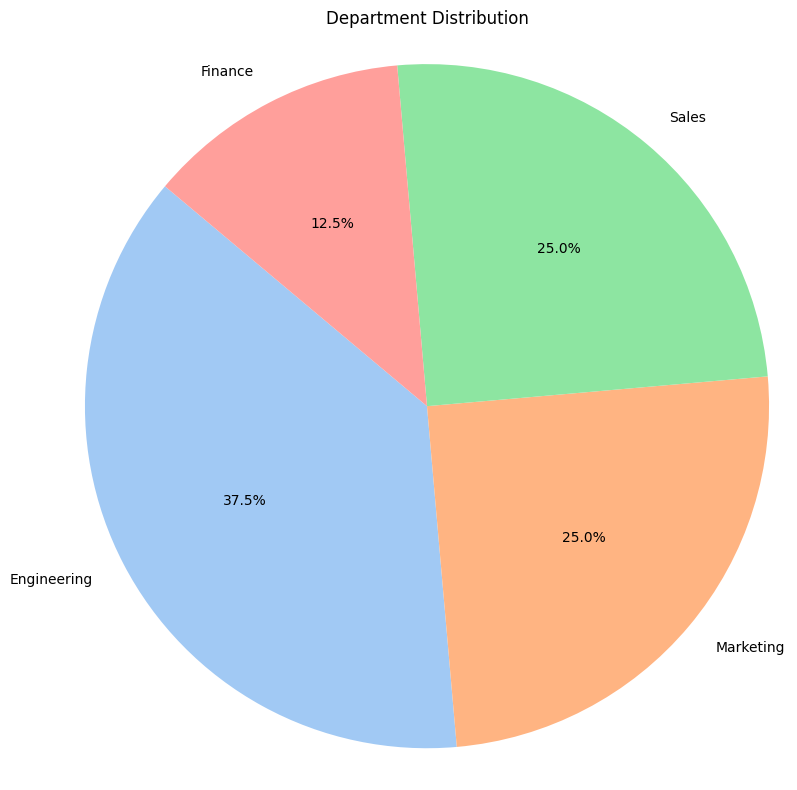

In [49]:
# Data analysis: Count of employees by position
employee_count_by_position = df['Position'].value_counts().reset_index()
employee_count_by_position.columns = ['Position', 'Employee_Count']

# Visualization 1: Bar plot of employee count by position
plt.figure(figsize=(10, 6))
sns.barplot(x='Employee_Count', y='Position', data=employee_count_by_position, palette='Set2')
plt.title('Employee Count by Position')
plt.xlabel('Employee Count')
plt.ylabel('Position')
plt.tight_layout()
plt.show()

# Visualization 2: Pie chart of department distribution
plt.figure(figsize=(8, 8))
plt.pie(df['Department'].value_counts(), labels=df['Department'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Department Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

Machine Learning: Advanced Analysis (Bonus)


In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('cleaned_employee_data.csv')

# Display the first few rows
data.head()


,Employee_ID,Name,Department,Position,Agreement_Date,Contract_Term,Base_Salary,Bonus,Benefits,Cloud_Service_Used,Tools_Used
0,1001,John Doe,Engineering,Software Engineer,2023-01-15,24,85000.0,5000.0,Healthcare,AWS,Python
1,1002,Jane Smith,Marketing,Marketing Specialist,2023-02-20,12,65000.0,3000.0,401(k),Azure,R
2,1003,Michael Johnson,Sales,Sales Manager,2023-03-10,36,100000.0,8000.0,Healthcare,GCP,SQL
3,1004,Emily Brown,Engineering,Data Scientist,2023-04-05,18,90000.0,6000.0,401(k),AWS,Python
4,1005,David Wilson,Finance,Financial Analyst,2024-06-19,24,75000.0,4000.0,Healthcare,Azure,Excel


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate features and target variable
X = data.drop('Base_Salary', axis=1)
y = data['Base_Salary']

# Define categorical and numerical columns
categorical_cols = ['Department', 'Position', 'Cloud_Service_Used', 'Tools_Used']
numerical_cols = ['Employee_ID', 'Contract_Term', 'Bonus']

# Preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Instantiate the model
model = RandomForestRegressor(random_state=42)

# Define the parameter distribution
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the randomized search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
best_params


Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the test set results
y_pred = random_search.best_estimator_.predict(X_test) # Use random_search instead of grid_search

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

r2, mse

(0.9677119223425846, 8926756.581229301)